In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


#I define the csv file
df = pd.read_csv("fifa_cleaned.csv")
#I limited to 45 age
df = df[df["age"] <= 45]

# I select to columns that I will use later
df = df[["name","age","stamina"]]

result = df[["name","age","stamina"]]

# I show the columns
print(result)


                 name  age  stamina
0            L. Messi   31       72
1          C. Eriksen   27       92
2            P. Pogba   25       88
3          L. Insigne   27       75
4        K. Koulibaly   27       75
...               ...  ...      ...
17949     R. McKenzie   25       75
17950       M. Sipľak   23       66
17951      J. Bekkema   22       25
17952      A. Al Yami   21       58
17953  Júnior Brumado   19       57

[17953 rows x 3 columns]


In [2]:
age_groups = df.groupby("age")
dfstamina = age_groups["stamina"].mean()


age = range(17, 45)
#I transfer list to pandas array for reshape it.
age = np.array(age).reshape(-1,1)

print(df)

                 name  age  stamina
0            L. Messi   31       72
1          C. Eriksen   27       92
2            P. Pogba   25       88
3          L. Insigne   27       75
4        K. Koulibaly   27       75
...               ...  ...      ...
17949     R. McKenzie   25       75
17950       M. Sipľak   23       66
17951      J. Bekkema   22       25
17952      A. Al Yami   21       58
17953  Júnior Brumado   19       57

[17953 rows x 3 columns]


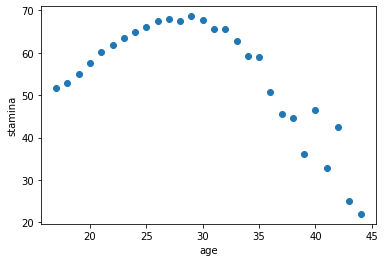

In [3]:
#I show our graph
plt.scatter(age,dfstamina)
plt.xlabel("age")
plt.ylabel("stamina")
plt.show()


In [4]:
#My aim is to examine the ratio between the age and energy of football players.
from sklearn.linear_model import LinearRegression

# linear regression model
linear_reg = LinearRegression()

#I reshaped the values
x = age.reshape(-1 ,1)
y = dfstamina.values.reshape(-1 ,1)

linear_reg.fit(x,y)

LinearRegression()

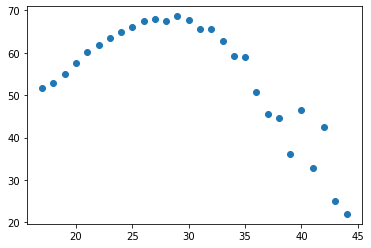

In [5]:
# visualize line
list = range(18, 45)# experience

array = np.array(list).reshape(-1,1)

#Before the reggration
plt.scatter(age,dfstamina)
plt.show()

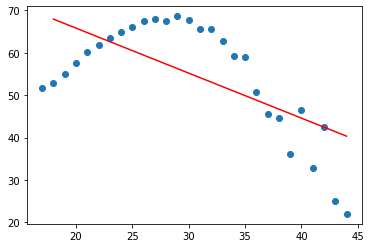

In [6]:
y_head = linear_reg.predict(array)

plt.plot(array, y_head,color = "red")


#I add this plt to see clearly
plt.scatter(age,dfstamina)
plt.show()

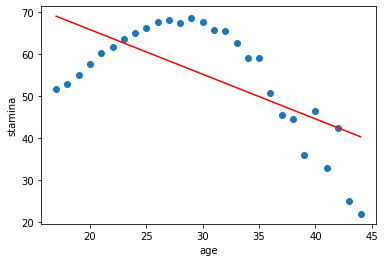

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(age,dfstamina)

#%% predict
y_head = lr.predict(x)

plt.scatter(age,dfstamina)
plt.xlabel("age")
plt.ylabel("stamina")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

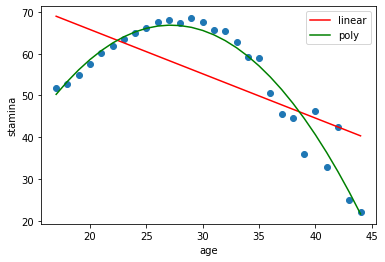

In [12]:
from sklearn.preprocessing import PolynomialFeatures

#I change the degree 6 and it fits perfect
polynomial_regression = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_regression.fit_transform(x)


# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

#The green lines the perfect match to our examples

y_head2 = linear_regression2.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("stamina")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()

#PolyReg perfect fit to our problem